# Preprocessing and Visualizing Time Series Data

## 1. Date Specific Python Functions

Let's discuss two in-built packages which specifically help us tackle date kind of data.

In [1]:
import numpy as np
import pandas as pd

from datetime import datetime
from dateutil import parser

%matplotlib inline
import matplotlib.pyplot as plt

pd.set_option('display.max_columns', None)

In [2]:
temp = datetime(year = 2015, month = 7, day = 4)
temp

datetime.datetime(2015, 7, 4, 0, 0)

In [3]:
temp = parser.parse('27th of December 1986')
temp

datetime.datetime(1986, 12, 27, 0, 0)

We can also use numpy to work with dates

In [4]:
temp = np.array('2015-07-04', dtype = np.datetime64)
temp

array('2015-07-04', dtype='datetime64[D]')

In [5]:
temp + np.arange(10)     # generated ten consecutive dates

array(['2015-07-04', '2015-07-05', '2015-07-06', '2015-07-07',
       '2015-07-08', '2015-07-09', '2015-07-10', '2015-07-11',
       '2015-07-12', '2015-07-13'], dtype='datetime64[D]')

## 2. An Example of Time Series Data

In [6]:
df = pd.read_csv('./data/female_birth.csv')
df.head()

,Date,"Daily total female births in California, 1959"
0,1959-01-01,35
1,1959-01-02,32
2,1959-01-03,30
3,1959-01-04,31
4,1959-01-05,44


In [7]:
print(df.shape)
print(df.size)

(366, 2)
732


In [8]:
df.describe()

,"Daily total female births in California, 1959"
count,366.000000
mean,47.218579
std,100.472534
min,23.000000
25%,37.000000
50%,42.000000
75%,46.000000
max,1959.000000


## 3. More Details on Datetime

In [9]:
df = pd.read_csv('./data/air_passengers.csv')  # monthly data on number of passengers
df.shape

(144, 2)

In [10]:
df.head()

,Month,#Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


In [11]:
df.dtypes

Month          object
#Passengers     int64
dtype: object

We note that the number of passengers are of integer type which is appropriate. However, the Month column is of object type, which is not suitable for numerical analysis. We transform it as follows: 

In [12]:
dateparse = lambda dates: pd.datetime.strptime(dates, '%Y-%m')

df = pd.read_csv('./data/air_passengers.csv',
                 parse_dates = ['Month'],
                 index_col = 'Month',      # we set month as the index
                 date_parser = dateparse)  # strptime separates out year and month

df.head()

,#Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


In [13]:
df.dtypes     # we have only one column as expected as we set month to be index

#Passengers    int64
dtype: object

In [14]:
df.index

DatetimeIndex(['1949-01-01', '1949-02-01', '1949-03-01', '1949-04-01',
               '1949-05-01', '1949-06-01', '1949-07-01', '1949-08-01',
               '1949-09-01', '1949-10-01',
               ...
               '1960-03-01', '1960-04-01', '1960-05-01', '1960-06-01',
               '1960-07-01', '1960-08-01', '1960-09-01', '1960-10-01',
               '1960-11-01', '1960-12-01'],
              dtype='datetime64[ns]', name='Month', length=144, freq=None)

Now, our months are of datetime type and thus suitable for numerical analysis

## 4. Basic Operations on Time Series Data

Timestamped data is the most basic type of time series data that associates values with points in time.

In [15]:
data = {'date': ['2014-05-01 18:47:05.069722', 
                 '2014-05-01 18:47:05.119994',
                 '2014-05-02 18:47:05.178768',
                 '2014-05-02 18:47:05.230071',
                 '2014-05-02 18:47:05.230071',
                 '2014-05-02 18:47:05.280592',
                 '2014-05-03 18:47:05.332662'],
        'battle_deaths': [34, 25, 26, 15, 15, 14, 26]}

df = pd.DataFrame(data, columns = ['date', 'battle_deaths'] )
df.head(7)

,date,battle_deaths
0,2014-05-01 18:47:05.069722,34
1,2014-05-01 18:47:05.119994,25
2,2014-05-02 18:47:05.178768,26
3,2014-05-02 18:47:05.230071,15
4,2014-05-02 18:47:05.230071,15
5,2014-05-02 18:47:05.280592,14
6,2014-05-03 18:47:05.332662,26


In [16]:
df.dtypes

date             object
battle_deaths     int64
dtype: object

In [17]:
df['date'] = pd.to_datetime(df['date'])  # converting to datetime type
df.dtypes

date             datetime64[ns]
battle_deaths             int64
dtype: object

In [18]:
df.set_index('date', inplace = True)
df.head(7)

,battle_deaths
date,
2014-05-01 18:47:05.069722,34
2014-05-01 18:47:05.119994,25
2014-05-02 18:47:05.178768,26
2014-05-02 18:47:05.230071,15
2014-05-02 18:47:05.230071,15
2014-05-02 18:47:05.280592,14
2014-05-03 18:47:05.332662,26


In [19]:
df.groupby(level = 0).count()   # number of observations per timestamp

,battle_deaths
date,
2014-05-01 18:47:05.069722,1
2014-05-01 18:47:05.119994,1
2014-05-02 18:47:05.178768,1
2014-05-02 18:47:05.230071,2
2014-05-02 18:47:05.280592,1
2014-05-03 18:47:05.332662,1


In [20]:
df['2014']      # all observations that occured in 2014

,battle_deaths
date,
2014-05-01 18:47:05.069722,34
2014-05-01 18:47:05.119994,25
2014-05-02 18:47:05.178768,26
2014-05-02 18:47:05.230071,15
2014-05-02 18:47:05.230071,15
2014-05-02 18:47:05.280592,14
2014-05-03 18:47:05.332662,26


In [21]:
df['2014-05-01']      # deaths occured on May 1st 2014

,battle_deaths
date,
2014-05-01 18:47:05.069722,34
2014-05-01 18:47:05.119994,25


Note: We can access these data because we converted our data to datetime format. In time-series analysis, we generally make the time column as index and in datetype format.

In [22]:
df[datetime(2014, 5, 2):]   # death occured on and after Feb 2nd, 2014

,battle_deaths
date,
2014-05-02 18:47:05.178768,26
2014-05-02 18:47:05.230071,15
2014-05-02 18:47:05.230071,15
2014-05-02 18:47:05.280592,14
2014-05-03 18:47:05.332662,26


In [23]:
df.resample('D').mean()    # mean deaths on each day

,battle_deaths
date,
2014-05-01,29.5
2014-05-02,17.5
2014-05-03,26.0


In [24]:
df.resample('D').sum()     # total deaths on each day

,battle_deaths
date,
2014-05-01,59
2014-05-02,70
2014-05-03,26


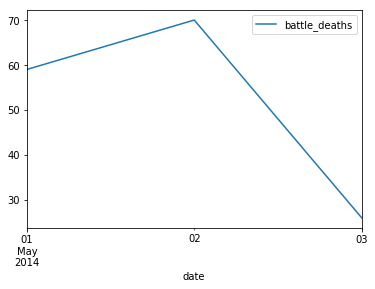

In [25]:
df.resample('D').sum().plot()    # plotting total deaths each day

## 5. Line Charts for Examining Temporal Data 

Line charts are most common way to represent time series data.

In [26]:
df = pd.read_csv('./data/italy_earthquakes_from_2016-08-24_to_2016-11-30.csv')
df['Time'] = pd.to_datetime(df['Time'])  # converting to datetime type
df.set_index('Time', inplace = True)
df.head()

,Latitude,Longitude,Depth/Km,Magnitude
Time,,,,
2016-08-24 03:36:32.000,42.6983,13.2335,8.1,6.0
2016-08-24 03:37:26.580,42.7123,13.2533,9.0,4.5
2016-08-24 03:40:46.590,42.7647,13.1723,9.7,3.8
2016-08-24 03:41:38.900,42.7803,13.1683,9.7,3.9
2016-08-24 03:42:07.170,42.7798,13.1575,9.7,3.6


Let's plot the daily average variation of magnitude using line chart. 

Before we plot, lets check this small chunk of code to understand the computation. This code takes data for each day, and then calculates the mean of all the entries for that day.

In [27]:
df['Magnitude'].resample('D').apply([np.mean])

,mean
Time,
2016-08-24,2.661614
2016-08-25,2.332917
2016-08-26,2.363679
2016-08-27,2.358571
2016-08-28,2.340909
...,...
2016-11-26,2.290244
2016-11-27,2.449315
2016-11-28,2.295122


Text(0, 0.5, 'Magnitude')

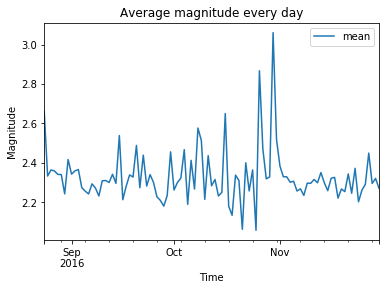

In [28]:
df['Magnitude'].resample('D').apply([np.mean]).plot()
plt.title('Average magnitude every day')
plt.ylabel('Magnitude')

We can also calculate the mean over two days like this:

In [29]:
df['Magnitude'].resample('2D').apply([np.mean])

,mean
Time,
2016-08-24,2.556150
2016-08-26,2.361648
2016-08-28,2.340761
2016-08-30,2.326277
2016-09-01,2.350000
2016-09-03,2.333588
2016-09-05,2.249000
2016-09-07,2.286585
2016-09-09,2.262069


Text(0, 0.5, 'Magnitude')

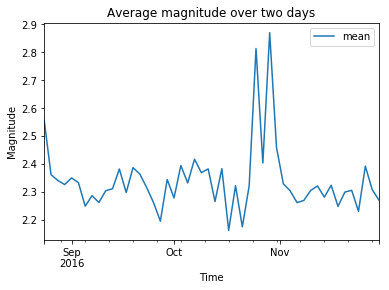

In [30]:
df['Magnitude'].resample('2D').apply([np.mean]).plot()
plt.title('Average magnitude over two days')
plt.ylabel('Magnitude')

Now, let's visualize rolling averages

In [31]:
cdf = df[df['Magnitude'] >= 3.0]     # select earthquakes with magnitude larger than 3
cdf = cdf['Magnitude']
print(type(cdf))

<class 'pandas.core.series.Series'>


Now, to get the rolling average, we select a window size and calculate mean over it

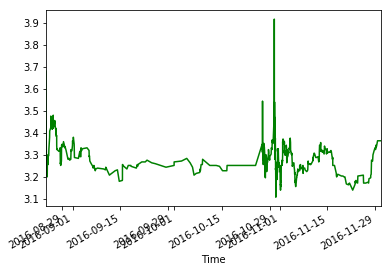

In [32]:
pd.Series.rolling(cdf, window = 25).mean().plot(style = '-g')

## 6. Multiple Lines in the Same Line Chart

Let's use the stocks data for this purpose

In [33]:
df = pd.read_csv('./data/stocks.csv', index_col = 'Date', parse_dates = ['Date'])
df.shape

(93612, 6)

In [34]:
df.head()     # Name = company name

,Open,High,Low,Close,Volume,Name
Date,,,,,,
2006-01-03,77.76,79.35,77.24,79.11,3117200,MMM
2006-01-04,79.49,79.49,78.25,78.71,2558000,MMM
2006-01-05,78.41,78.65,77.56,77.99,2529500,MMM
2006-01-06,78.64,78.90,77.64,78.63,2479500,MMM
2006-01-09,78.50,79.83,78.46,79.02,1845600,MMM


In [35]:
df['Name'].unique()          # all companies

array(['MMM', 'AXP', 'AAPL', 'BA', 'CAT', 'CVX', 'CSCO', 'KO', 'DIS',
       'XOM', 'GE', 'GS', 'HD', 'IBM', 'INTC', 'JNJ', 'JPM', 'MCD', 'MRK',
       'MSFT', 'NKE', 'PFE', 'PG', 'TRV', 'UTX', 'UNH', 'VZ', 'WMT',
       'GOOGL', 'AMZN', 'AABA'], dtype=object)

Let's visualize the temporal variation in opening value of stock (column Open) for three different companies

In [36]:
stock_apple = df.query('Name == "AAPL"')
stock_google = df.query('Name == "GOOGL"')
stock_british_airways = df.query('Name == "BA"')

In [37]:
stock_apple.head()

,Open,High,Low,Close,Volume,Name
Date,,,,,,
2006-01-03,10.34,10.68,10.32,10.68,201853036,AAPL
2006-01-04,10.73,10.85,10.64,10.71,155225609,AAPL
2006-01-05,10.69,10.70,10.54,10.63,112396081,AAPL
2006-01-06,10.75,10.96,10.65,10.90,176139334,AAPL
2006-01-09,10.96,11.03,10.82,10.86,168861224,AAPL


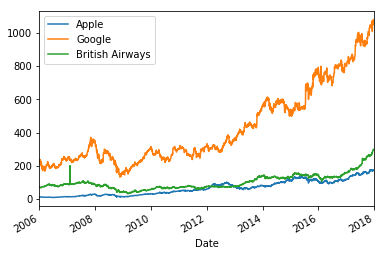

In [38]:
stock_apple.Open.plot()
stock_google.Open.plot()
stock_british_airways.Open.plot()
plt.legend(['Apple', 'Google', 'British Airways'])

## 7. Aggregating and Visualizing Data Summary

In [39]:
df = pd.read_csv('./data/avocado.csv', parse_dates = ['Date'])
df.shape

(18249, 14)

In [40]:
df.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


Let's group Total Volume by date, calculate the mean

In [41]:
df_grouped = df.groupby('Date')['Total Volume'].mean().reset_index()
df_grouped.set_index('Date', inplace = True)
df_grouped.head()

,Total Volume
Date,
2015-01-04,7.840216e+05
2015-01-11,7.273686e+05
2015-01-18,7.258221e+05
2015-01-25,7.080211e+05
2015-02-01,1.106048e+06


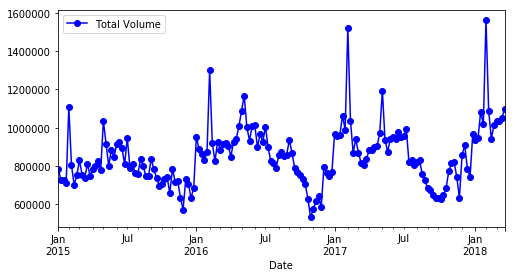

In [42]:
fig, ax = plt.subplots(1, 1, figsize = (8,4))
df_grouped.plot(ax = ax, marker = 'o', linestyle = '-', color = 'blue')

We can also compute and visualize summary statistic such as mean, median....

Let's compute these statistics for Total Volume for each month. So, we groupby month, and then compute these statistics:

Text(0.5, 0, 'Month')

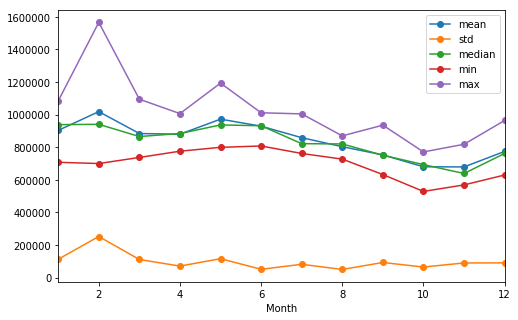

In [43]:
fig, ax = plt.subplots(1, 1, figsize = (8,5))
df_grouped.assign(month = lambda df: df.index.month).groupby('month')['Total Volume'].agg(
    ['mean', 'std', 'median', 'min', 'max']).plot(ax = ax, marker = 'o')

ax.set_xlabel('Month') 

## 8. Data Munging Techniques for Insights 
   **(Using multiple line plots for discerning specific information)**

In [44]:
df = pd.read_csv('./data/stocks.csv', parse_dates = ['Date'])
df.shape

(93612, 7)

In [45]:
df.head()

,Date,Open,High,Low,Close,Volume,Name
0,2006-01-03,77.76,79.35,77.24,79.11,3117200,MMM
1,2006-01-04,79.49,79.49,78.25,78.71,2558000,MMM
2,2006-01-05,78.41,78.65,77.56,77.99,2529500,MMM
3,2006-01-06,78.64,78.90,77.64,78.63,2479500,MMM
4,2006-01-09,78.50,79.83,78.46,79.02,1845600,MMM


In [46]:
range_date = pd.date_range(start = '2006-01-01', end = '2018-01-01', freq = 'B') # B: Biweekly
range_date[~range_date.isin(df.Date.unique())]   # uniques dates: understand this part

DatetimeIndex(['2006-01-02', '2006-01-16', '2006-02-20', '2006-04-14',
               '2006-05-29', '2006-07-04', '2006-09-04', '2006-11-23',
               '2006-12-25', '2007-01-01',
               ...
               '2017-01-02', '2017-01-16', '2017-02-20', '2017-04-14',
               '2017-05-29', '2017-07-04', '2017-09-04', '2017-11-23',
               '2017-12-25', '2018-01-01'],
              dtype='datetime64[ns]', length=111, freq=None)

In [47]:
sample_dates = pd.date_range(start = '2006-01-01', end = '2018-01-01', freq = 'B')
year_end_dates = sample_dates[sample_dates.is_year_end]

Now, let's get the five worst performing stocks

In [48]:
worst_stocks = df[df.Date == df.Date.max()].sort_values('Open').head(5)
worst_stocks.head()

,Date,Open,High,Low,Close,Volume,Name
33217,2017-12-29,17.27,17.53,17.27,17.45,76149513,GE
66434,2017-12-29,36.23,36.49,36.22,36.22,11421487,PFE
21137,2017-12-29,38.41,38.62,38.30,38.30,12583621,CSCO
24157,2017-12-29,45.70,46.18,45.69,45.88,8371536,KO
45296,2017-12-29,46.21,46.49,46.09,46.16,17394491,INTC


In [49]:
ws = worst_stocks.Name.values
ws

array(['GE', 'PFE', 'CSCO', 'KO', 'INTC'], dtype=object)

In [50]:
tdf = df.copy()
tdf = df.set_index('Date')
tdf.head()

,Open,High,Low,Close,Volume,Name
Date,,,,,,
2006-01-03,77.76,79.35,77.24,79.11,3117200,MMM
2006-01-04,79.49,79.49,78.25,78.71,2558000,MMM
2006-01-05,78.41,78.65,77.56,77.99,2529500,MMM
2006-01-06,78.64,78.90,77.64,78.63,2479500,MMM
2006-01-09,78.50,79.83,78.46,79.02,1845600,MMM


Name
CSCO    AxesSubplot(0.125,0.2;0.775x0.68)
GE      AxesSubplot(0.125,0.2;0.775x0.68)
INTC    AxesSubplot(0.125,0.2;0.775x0.68)
KO      AxesSubplot(0.125,0.2;0.775x0.68)
PFE     AxesSubplot(0.125,0.2;0.775x0.68)
Name: Open, dtype: object

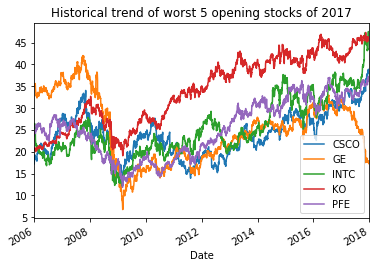

In [51]:
tdf[tdf.Name.isin(ws)].groupby('Name').Open.plot(
    title = 'Historical trend of worst 5 opening stocks of 2017', legend = True)

## 9. Histograms 

In [52]:
df = pd.read_csv('./data/italy_earthquakes_from_2016-08-24_to_2016-11-30.csv')
df.shape

(8086, 5)

In [53]:
df.head()

,Time,Latitude,Longitude,Depth/Km,Magnitude
0,2016-08-24 03:36:32.000,42.6983,13.2335,8.1,6.0
1,2016-08-24 03:37:26.580,42.7123,13.2533,9.0,4.5
2,2016-08-24 03:40:46.590,42.7647,13.1723,9.7,3.8
3,2016-08-24 03:41:38.900,42.7803,13.1683,9.7,3.9
4,2016-08-24 03:42:07.170,42.7798,13.1575,9.7,3.6


In [54]:
cdf = df[(df['Depth/Km'] < 22) & (df['Depth/Km'] >= 0)]['Depth/Km']
cdf.head()

0    8.1
1    9.0
2    9.7
3    9.7
4    9.7
Name: Depth/Km, dtype: float64

Text(0.5, 0, 'Depth/Km')

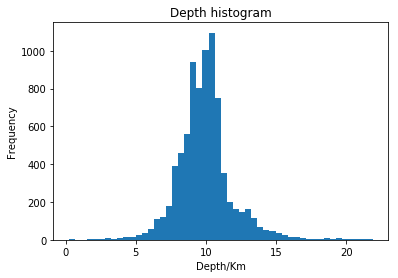

In [55]:
plt.figure(figsize = (6,4))
cdf.plot(kind = 'hist', stacked = True, bins = 50)
plt.title('Depth histogram')
plt.xlabel('Depth/Km')

## 10. Plot the Temporal Variation of Two Entities

Earlier, we saw how to plot temporal variation in two entities using line charts. It is equally possible to do that using bar plots.

In [56]:
df = pd.read_csv('./data/italy_earthquakes_from_2016-08-24_to_2016-11-30.csv')
df.set_index('Time', inplace = True)
df.index = pd.to_datetime(df.index)
df.shape

(8086, 4)

In [57]:
df.head()

,Latitude,Longitude,Depth/Km,Magnitude
Time,,,,
2016-08-24 03:36:32.000,42.6983,13.2335,8.1,6.0
2016-08-24 03:37:26.580,42.7123,13.2533,9.0,4.5
2016-08-24 03:40:46.590,42.7647,13.1723,9.7,3.8
2016-08-24 03:41:38.900,42.7803,13.1683,9.7,3.9
2016-08-24 03:42:07.170,42.7798,13.1575,9.7,3.6


We have two entities to characterize the earth quake, Depth/Km and Magnitude.

In [58]:
cdf = df.where((df['Magnitude'] >= 3.0)).dropna()[['Magnitude', 'Depth/Km']]
cdf.head()

,Magnitude,Depth/Km
Time,,
2016-08-24 03:36:32.000,6.0,8.1
2016-08-24 03:37:26.580,4.5,9.0
2016-08-24 03:40:46.590,3.8,9.7
2016-08-24 03:41:38.900,3.9,9.7
2016-08-24 03:42:07.170,3.6,9.7


In [59]:
dm = cdf.groupby(cdf.index.hour).mean()
dm.head()

,Magnitude,Depth/Km
Time,,
0,3.219048,9.071429
1,3.341667,9.720833
2,3.271429,9.457143
3,3.393478,9.556522
4,3.369811,9.173585


Text(0.5, 1.0, 'Magnitude and Depth during the day')

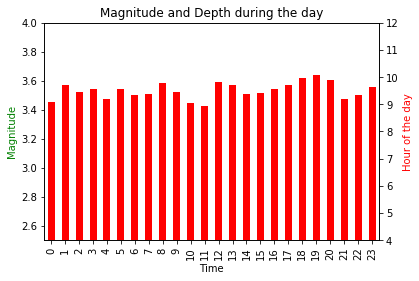

In [60]:
fig = plt.figure(figsize = (6,4))
ax = fig.add_subplot(111)
ax.set_ylim(2.5, 4.0)
ax.set_ylabel('Magnitude')
ax.set_xlabel('Hour of the day')
ax.yaxis.label.set_color('green')

ax2 = ax.twinx()
ax2.set_ylim([4.0, 12])
ax2.set_ylabel('Depth/Km')
ax2.set_ylabel('Hour of the day')
ax2.yaxis.label.set_color('red')

width = 0.5

dm['Magnitude'].plot(kind = 'bar', color = 'green', ax = ax, width = width)  # position key not shown in lecture
dm['Depth/Km'].plot(kind = 'bar', color = 'red', ax = ax2, width = width)

plt.grid(False)
plt.title('Magnitude and Depth during the day')